<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/Manipula%C3%A7%C3%A3o_Avan%C3%A7ada_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

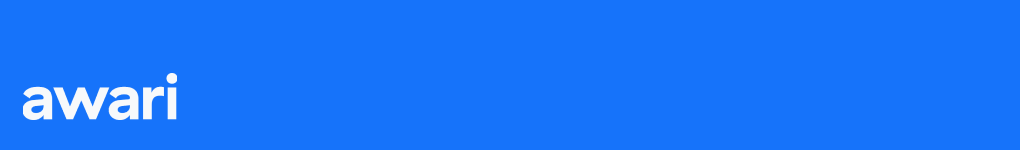

Prática da **Aula 07: Estatística Descritiva I**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Manipulação avançada de dados**

## **Objetivo**

Nesta prática, veremos algumas operações mais avançadas que **Pandas** nos permite aplicar sobre bases de dados. Entre elas, como mesclar ou unir dataframes e como reorganizá-los e agregá-los de outras maneiras que facilitam nossas análises.

## **Prática**

### **Import libraries**

We are going to use Pandas and Numpy:

In [2]:
import pandas as pd
import numpy as np

### **Creating DataFrames**



In [3]:
# DataFrame 1
d1 = {'id_cliente':pd.Series([1,2,3,4,5,6]),
  'produto':pd.Series(['Fogão','Fogão','Fogão','Televisão','Televisão','Televisão'])}
df1 = pd.DataFrame(d1)


# DataFrame 2
d2 = {'id_cliente':pd.Series([2,4,6,7,8]),
    'estado':pd.Series(['Rio de Janeiro','Rio de Janeiro','Bahia','Goiás','Paraná'])}
df2 = pd.DataFrame(d2)

In [4]:
df1

id_cliente    produto
0           1      Fogão
1           2      Fogão
2           3      Fogão
3           4  Televisão
4           5  Televisão
5           6  Televisão

In [5]:
df2

id_cliente          estado
0           2  Rio de Janeiro
1           4  Rio de Janeiro
2           6           Bahia
3           7           Goiás
4           8          Paraná

### **Operations with DataFrames**

#### **`merge`**

##### INNER JOIN

Returns only the rows at the intersection between the left table and the right table. In other words, it returns only what is in the table on the left and in the table on the right.

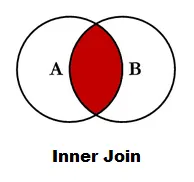

We want to know how many stoves and televisons were sold in

Rio de Janeiro, São Paulo and Bahia?

In [6]:
pd.merge(df1, df2, on='id_cliente', how='inner')


id_cliente    produto          estado
0           2      Fogão  Rio de Janeiro
1           4  Televisão  Rio de Janeiro
2           6  Televisão           Bahia

According to this information of the data were sold 2 stoves

in Rio de Janeiro, considering the store located in

Rio de Janeiro were sold

##### OUTER JOIN

Returns all rows from both tables, one of the records on the left having matching keys in the table on the right. When no table matches, `NaN` is returned.

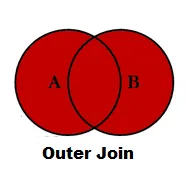

In [7]:
pd.merge(df1, df2, on='id_cliente', how='outer')

id_cliente    produto          estado
0           1      Fogão             NaN
1           2      Fogão  Rio de Janeiro
2           3      Fogão             NaN
3           4  Televisão  Rio de Janeiro
4           5  Televisão             NaN
5           6  Televisão           Bahia
6           7        NaN           Goiás
7           8        NaN          Paraná

##### LEFT JOIN

Returns all rows from the left table and all rows with matching keys from the right table. When there is no match from the trailing table, `NaN` is returned.

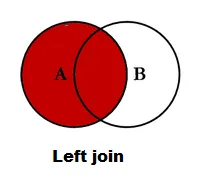






In [9]:
pd.merge(df1, df2, on='id_cliente', how='left')

id_cliente    produto          estado
0           1      Fogão             NaN
1           2      Fogão  Rio de Janeiro
2           3      Fogão             NaN
3           4  Televisão  Rio de Janeiro
4           5  Televisão             NaN
5           6  Televisão           Bahia

##### RIGHT JOIN

Return all rows from the right table and all rows with matching keys from the left table. When there is no match from the trailing table, `NaN` is returned.

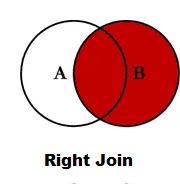

In [10]:
pd.merge(df1, df2, on='id_cliente', how='right')

id_cliente    produto          estado
0           2      Fogão  Rio de Janeiro
1           4  Televisão  Rio de Janeiro
2           6  Televisão           Bahia
3           7        NaN           Goiás
4           8        NaN          Paraná

#### **`concat`**

Concatenates two tables and keeps the old index:



In [11]:
pd.concat([df1, df2])

id_cliente    produto          estado
0           1      Fogão             NaN
1           2      Fogão             NaN
2           3      Fogão             NaN
3           4  Televisão             NaN
4           5  Televisão             NaN
5           6  Televisão             NaN
0           2        NaN  Rio de Janeiro
1           4        NaN  Rio de Janeiro
2           6        NaN           Bahia
3           7        NaN           Goiás
4           8        NaN          Paraná

Concatenates two tables and changes the index, reindexing:



In [12]:
pd.concat([df1, df2], ignore_index=True)

id_cliente    produto          estado
0            1      Fogão             NaN
1            2      Fogão             NaN
2            3      Fogão             NaN
3            4  Televisão             NaN
4            5  Televisão             NaN
5            6  Televisão             NaN
6            2        NaN  Rio de Janeiro
7            4        NaN  Rio de Janeiro
8            6        NaN           Bahia
9            7        NaN           Goiás
10           8        NaN          Paraná

Concatenates both tables based on their column index. `axis = 1` indicates that concatenation should be done based on the column index:




In [13]:
pd.concat([df1,df2], axis=1)

id_cliente    produto  id_cliente          estado
0           1      Fogão         2.0  Rio de Janeiro
1           2      Fogão         4.0  Rio de Janeiro
2           3      Fogão         6.0           Bahia
3           4  Televisão         7.0           Goiás
4           5  Televisão         8.0          Paraná
5           6  Televisão         NaN             NaN

#### **`groupby`**

Datasets emerge the way we need them. Transformations are easy and aggregations are inevitable.

To aggregate data and be able to extract insights from it we use the groupby() method

##### Dividir dados em grupos

Usaremos novamente o dataset do naufrágio do Titanic para exemplo:

In [14]:
dados = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'

df = pd.read_csv(dados)

In [15]:
# Agrupando os dados pela média da coluna `Sex`
df.groupby('Sex').mean()

<ipython-input-15-198dd6141b32>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sex').mean()


PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893

Para retomar a categoria "sexo" como uma coluna, usamos o parâmetro `reset_index`:



In [16]:
df.groupby('Sex').mean().reset_index()


<ipython-input-16-867cedaf224d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sex').mean().reset_index()


Sex  PassengerId  Survived    Pclass        Age     SibSp     Parch  \
0  female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
1    male   454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

        Fare  
0  44.479818  
1  25.523893

##### Agrupar por mais de uma coluna

Permite ver a taxa de sobrevivência por sexo, por exemplo. Para isso, podemos agrupar por `Sex` e `Survived`:



In [17]:
df.groupby(['Sex', 'Survived'] )['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

#### **`unstack`**

Transforma valores de índice em nomes de coluna. Muito grosseiramente, podemos dizer que ele transpõe e agrega o quadro de dados.

Por exemplo, se quisermos ver a distribuição interna dos sobreviventes em cada grupo baseado em sexo, achataremos o quadro de dados usando o método `unstack()`:

In [18]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex')


Sex       female  male
Survived              
0             81   468
1            233   109

#### **`pivot_table`**

Resume os valores de um recurso em uma tabela bidimensional organizada -- recurso idêntico ao das "tabelas dinâmicas" do Microsoft Excel.

##### Agrupar dados usando índice em uma tabela dinâmica

In [19]:
pd.pivot_table(data=df,index=['Sex'])

<ipython-input-19-6949eee6edf6>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(data=df,index=['Sex'])


Age       Fare     Parch  PassengerId    Pclass     SibSp  \
Sex                                                                       
female  27.915709  44.479818  0.649682   431.028662  2.159236  0.694268   
male    30.726645  25.523893  0.235702   454.147314  2.389948  0.429809   

        Survived  
Sex               
female  0.742038  
male    0.188908

##### Pivot multi-índice

In [20]:
pd.pivot_table(df,index=['Sex','Pclass'])


<ipython-input-20-60eb620b608b>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=['Sex','Pclass'])


Age        Fare     Parch  PassengerId     SibSp  \
Sex    Pclass                                                           
female 1       34.611765  106.125798  0.457447   469.212766  0.553191   
       2       28.722973   21.970121  0.605263   443.105263  0.486842   
       3       21.750000   16.118810  0.798611   399.729167  0.895833   
male   1       41.281386   67.226127  0.278689   455.729508  0.311475   
       2       30.740707   19.741782  0.222222   447.962963  0.342593   
       3       26.507589   12.661633  0.224784   455.515850  0.498559   

               Survived  
Sex    Pclass            
female 1       0.968085  
       2       0.921053  
       3       0.500000  
male   1       0.368852  
       2       0.157407  
       3       0.135447

##### Função de agregação diferente para diferentes recursos

Os valores mostrados na tabela são o resultado da sumarização que `aggfunc` aplica aos dados do recurso.

`aggfunc` é uma função agregada que `pivot_table` aplica aos seus dados agrupados.

Usaremos `np.mean()` para o recurso `Age` e `np.sum()` para o recurso `Survived`:


In [21]:
import numpy as np

pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**